# Model Comparison - ARIMA(X) vs ML

In [2]:
# Load Data
import pandas as pd
models_for_comparison = pd.read_parquet('../data/best_performing_models_arima-x_ml2021-08-07T12-00-31.parquet', engine='pyarrow')

,ID,PARAMETER,MODEL,LIBRARY,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,TP,FN,FP,TN,FPR,TPR,FNR,TNR,EVALUATION_SCORE
0,BP_A_01_12_d_L,BP,ARIMA,darts,Median,n/a,12,Low,30,118,49,4639,0.0105,0.2027,0.7973,0.9895,0.076336
1,BP_A_01_12_d_H,BP,ARIMA,darts,Median,n/a,12,High,150,132,103,4451,0.0226,0.5319,0.4681,0.9774,0.188206
2,HR_A_02_12_d_L,HR,ARIMA,darts,Min,n/a,12,Low,211,215,348,47567,0.0073,0.4953,0.5047,0.9927,0.097415
3,HR_A_03_12_d_H,HR,ARIMAX,darts,Max,Median,12,High,268,510,301,47265,0.0063,0.3445,0.6555,0.9937,0.117389
4,O2_A_02_12_d_L,O2,ARIMA,darts,Min,n/a,12,Low,158,400,1169,24168,0.0461,0.2832,0.7168,0.9539,0.024676
5,O2_A_01_12_d_H,O2,ARIMA,darts,Median,n/a,12,High,36,0,234,25627,0.0090,1.0000,0.0000,0.9910,0.029851
6,BP_R_05_L_v2,BP,GRU,darts,Median,None,12,Low,55,93,125,4564,0.0267,0.3716,0.6284,0.9733,0.071200
7,BP_R_11_H,BP,GRU,darts,Median,None,12,High,142,140,54,4501,0.0119,0.5035,0.4965,0.9881,0.257200
8,HR_R_11_L,HR,GRU,darts,Median,None,12,Low,167,222,65,47894,0.0014,0.4293,0.5707,0.9986,0.233900
9,HR_R_11_H,HR,GRU,darts,Median,None,12,High,179,505,82,47582,0.0017,0.2617,0.7383,0.9983,0.163600


In [10]:
# Add more general Model IDs for Comparison
import numpy as np
models_for_comparison['HOLISTIC_ID'] = models_for_comparison.PARAMETER + str('_') + models_for_comparison.ALARM_TYPE
models_for_comparison['MODEL_TYPE'] = np.where((models_for_comparison['MODEL'] == 'ARIMA') | (models_for_comparison['MODEL'] == 'ARIMAX'), 'ARIMA_X','ML')
models_for_comparison['HOLISTIC_ID_WITH_MODEL'] = models_for_comparison['HOLISTIC_ID'] + '_' + models_for_comparison['MODEL_TYPE']
models_for_comparison.sort_values('HOLISTIC_ID')

,ID,PARAMETER,MODEL,LIBRARY,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,TP,FN,FP,TN,FPR,TPR,FNR,TNR,EVALUATION_SCORE,HOLISTIC_ID,MODEL_TYPE,HOLISTIC_ID_WITH_MODEL
1,BP_A_01_12_d_H,BP,ARIMA,darts,Median,n/a,12,High,150,132,103,4451,0.0226,0.5319,0.4681,0.9774,0.188206,BP_High,ARIMA_X,BP_High_ARIMA_X
7,BP_R_11_H,BP,GRU,darts,Median,None,12,High,142,140,54,4501,0.0119,0.5035,0.4965,0.9881,0.257200,BP_High,ML,BP_High_ML
0,BP_A_01_12_d_L,BP,ARIMA,darts,Median,n/a,12,Low,30,118,49,4639,0.0105,0.2027,0.7973,0.9895,0.076336,BP_Low,ARIMA_X,BP_Low_ARIMA_X
6,BP_R_05_L_v2,BP,GRU,darts,Median,None,12,Low,55,93,125,4564,0.0267,0.3716,0.6284,0.9733,0.071200,BP_Low,ML,BP_Low_ML
3,HR_A_03_12_d_H,HR,ARIMAX,darts,Max,Median,12,High,268,510,301,47265,0.0063,0.3445,0.6555,0.9937,0.117389,HR_High,ARIMA_X,HR_High_ARIMA_X
9,HR_R_11_H,HR,GRU,darts,Median,None,12,High,179,505,82,47582,0.0017,0.2617,0.7383,0.9983,0.163600,HR_High,ML,HR_High_ML
2,HR_A_02_12_d_L,HR,ARIMA,darts,Min,n/a,12,Low,211,215,348,47567,0.0073,0.4953,0.5047,0.9927,0.097415,HR_Low,ARIMA_X,HR_Low_ARIMA_X
8,HR_R_11_L,HR,GRU,darts,Median,None,12,Low,167,222,65,47894,0.0014,0.4293,0.5707,0.9986,0.233900,HR_Low,ML,HR_Low_ML
5,O2_A_01_12_d_H,O2,ARIMA,darts,Median,n/a,12,High,36,0,234,25627,0.0090,1.0000,0.0000,0.9910,0.029851,O2_High,ARIMA_X,O2_High_ARIMA_X
11,O2_R_07_H,O2,RNN,darts,Median,None,12,High,36,0,2,25863,0.0001,1.0000,0.0000,0.9999,0.782600,O2_High,ML,O2_High_ML


## Visualization of Evaluation Score

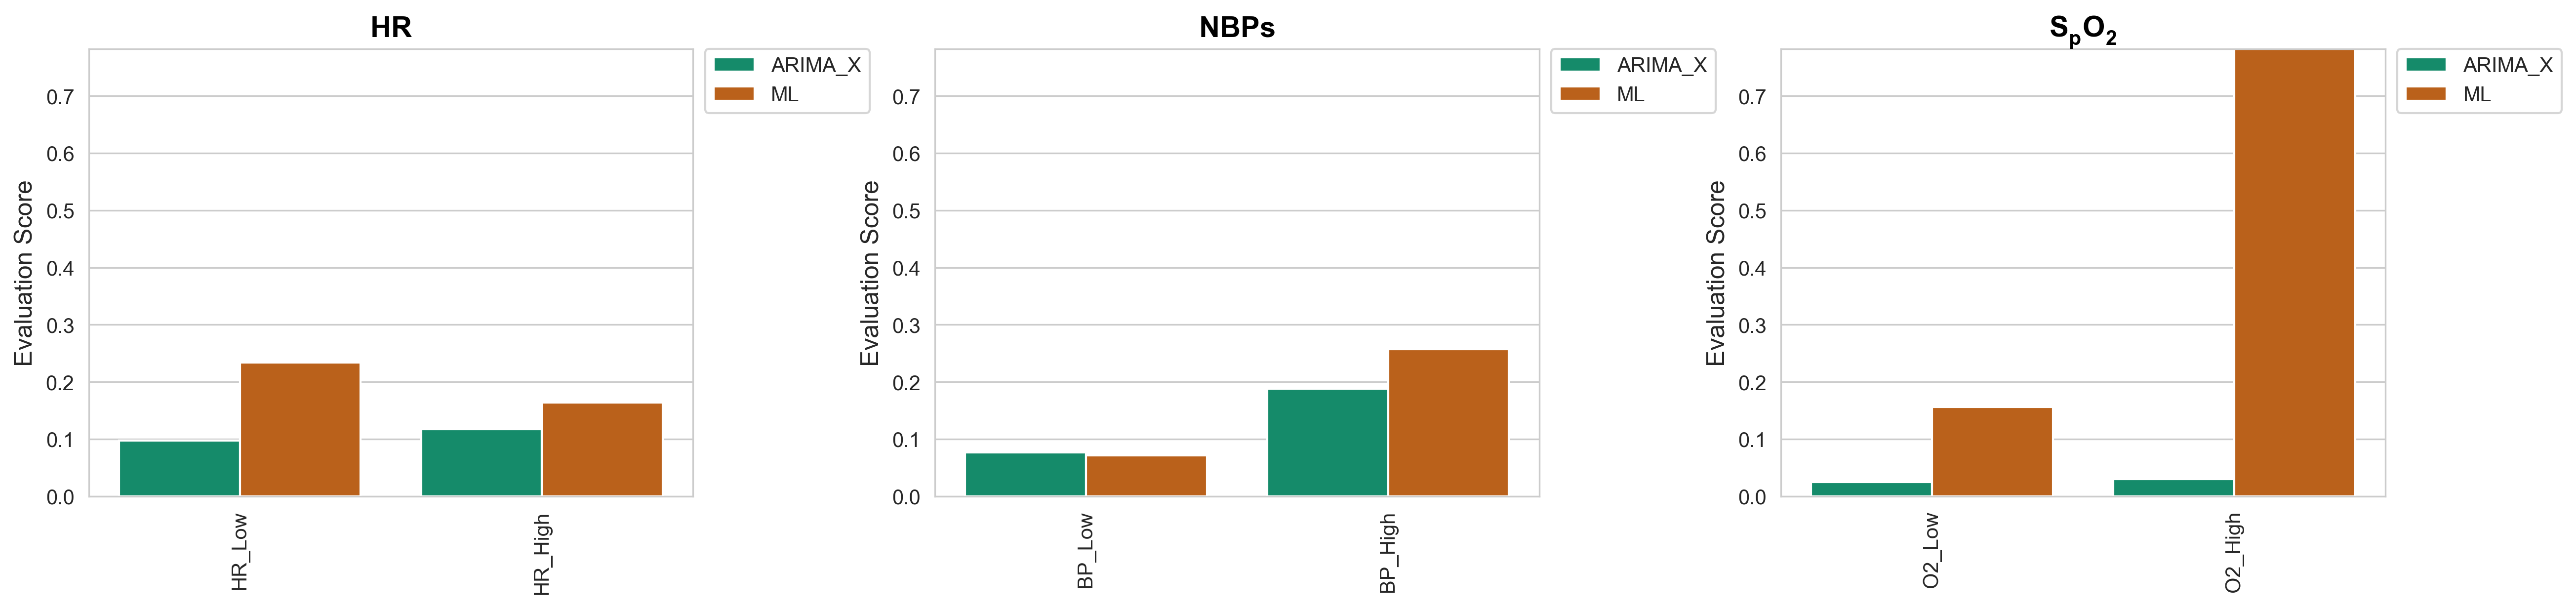

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = models_for_comparison


sns.set_style("whitegrid")
plotdata = overview
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]
fig, axs = plt.subplots(
    1,
    3,
    figsize = (20, 4),
    dpi = 300
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

evaluation_score_ylimits = [0,max(overview.EVALUATION_SCORE)]

for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='HOLISTIC_ID',
        y='EVALUATION_SCORE',
        hue='MODEL_TYPE',
        palette = sns.color_palette("colorblind")[2:4],
        ci=None,
        #hue_order=['Low','High']
        )
    axs[i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[i].set_ylabel('Evaluation Score', fontsize=12)
    axs[i].set_ylim(evaluation_score_ylimits)
    axs[i].tick_params(axis="x", rotation=90)
    axs[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    axs[i].set(xlabel=None)    

   

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'evaluation_score_arima-x_vs_ml_first2000_final' + timestamp + '.png'), dpi=300, bbox_inches='tight')  

    

plt.show(fig)

Model Comparison Transparent

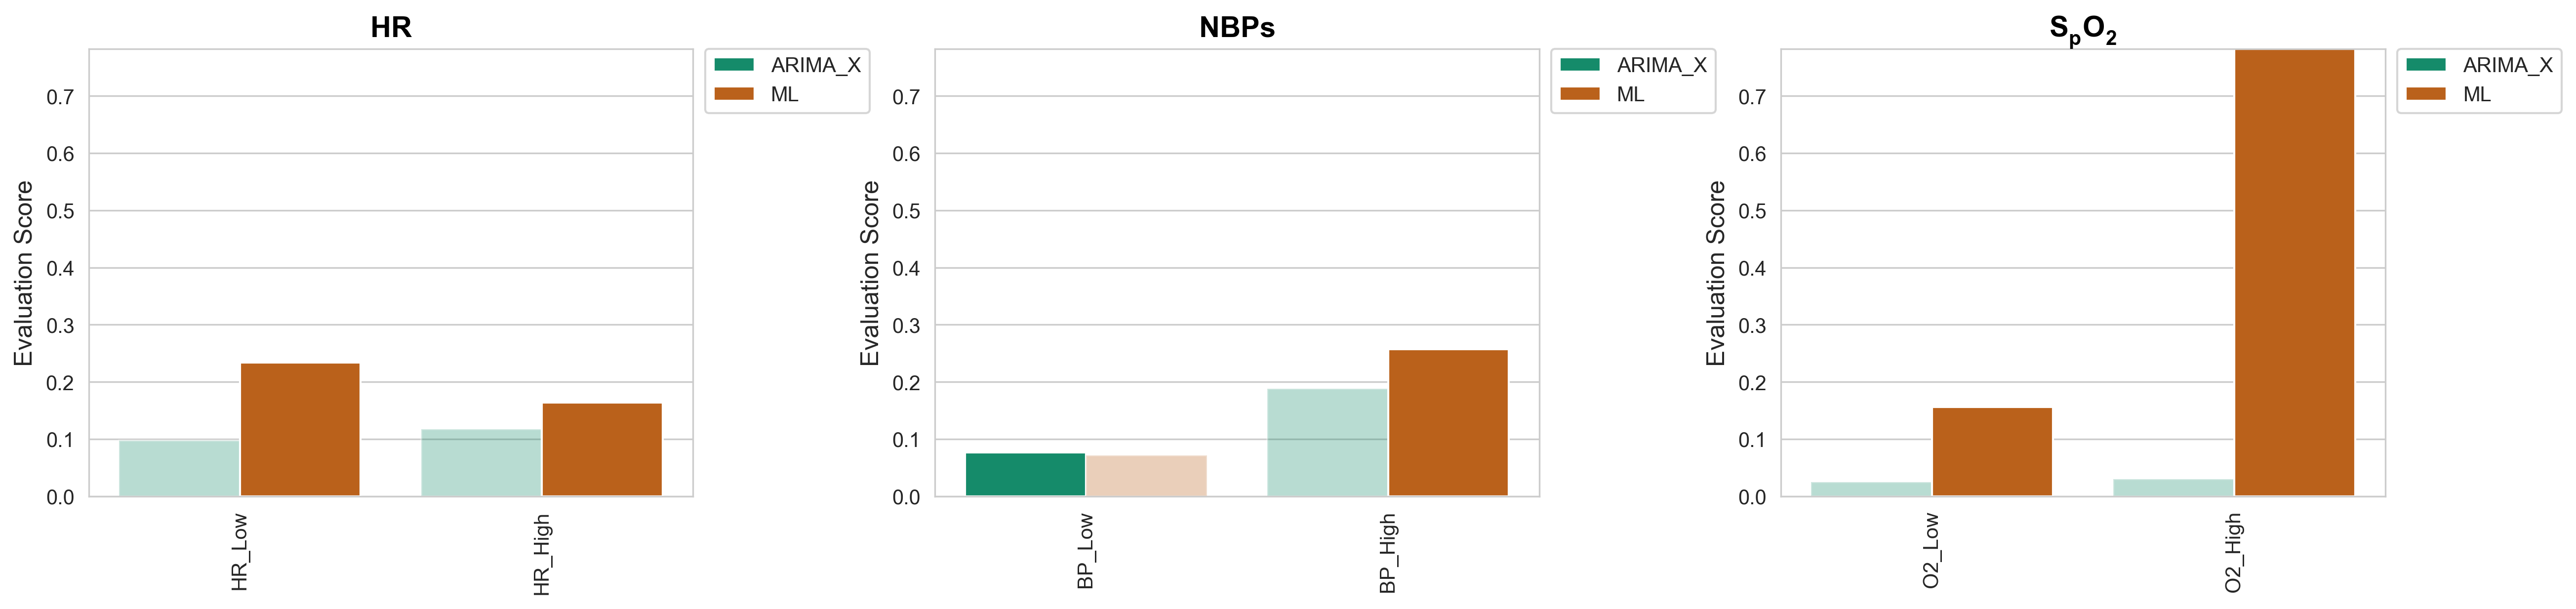

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = models_for_comparison

sns.set_style("whitegrid")

plotdata = overview
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]


fig, axs = plt.subplots(
    1,
    3,
    figsize = (20, 4),
    dpi = 300
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

evaluation_score_ylimits = [0,max(overview.EVALUATION_SCORE)]

for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='HOLISTIC_ID',
        y='EVALUATION_SCORE',
        hue='MODEL_TYPE',
        palette = sns.color_palette("colorblind")[2:4],
        ci=None,
        #hue_order=['Low','High']
        )
    axs[i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[i].set_ylabel('Evaluation Score', fontsize=12)
    axs[i].set_ylim(evaluation_score_ylimits)
    axs[i].tick_params(axis="x", rotation=90)
    axs[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    axs[i].set(xlabel=None)    

    best_evaluation_score_low = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()
    best_evaluation_score_high = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()
    for bar in plot1.patches:
        if bar.get_height() != best_evaluation_score_low and bar.get_height() != best_evaluation_score_high :
            bar.set_alpha(0.3)

   

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'evaluation_score_arima-x_vs_ml_first2000_transparent_final' + timestamp + '.png'), dpi=300, bbox_inches='tight')  

    

plt.show(fig)

In [11]:
# Sort
models_for_comparisonl = models_for_comparison.sort_values(by=['PARAMETER','HOLISTIC_ID','MODEL_TYPE'], ascending = [True,False,True]).reset_index(drop=True)
display(models_for_comparison)

,ID,PARAMETER,MODEL,LIBRARY,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,TP,FN,FP,TN,FPR,TPR,FNR,TNR,EVALUATION_SCORE,HOLISTIC_ID,MODEL_TYPE,HOLISTIC_ID_WITH_MODEL
0,BP_A_01_12_d_L,BP,ARIMA,darts,Median,n/a,12,Low,30,118,49,4639,0.0105,0.2027,0.7973,0.9895,0.076336,BP_Low,ARIMA_X,BP_Low_ARIMA_X
1,BP_A_01_12_d_H,BP,ARIMA,darts,Median,n/a,12,High,150,132,103,4451,0.0226,0.5319,0.4681,0.9774,0.188206,BP_High,ARIMA_X,BP_High_ARIMA_X
2,HR_A_02_12_d_L,HR,ARIMA,darts,Min,n/a,12,Low,211,215,348,47567,0.0073,0.4953,0.5047,0.9927,0.097415,HR_Low,ARIMA_X,HR_Low_ARIMA_X
3,HR_A_03_12_d_H,HR,ARIMAX,darts,Max,Median,12,High,268,510,301,47265,0.0063,0.3445,0.6555,0.9937,0.117389,HR_High,ARIMA_X,HR_High_ARIMA_X
4,O2_A_02_12_d_L,O2,ARIMA,darts,Min,n/a,12,Low,158,400,1169,24168,0.0461,0.2832,0.7168,0.9539,0.024676,O2_Low,ARIMA_X,O2_Low_ARIMA_X
5,O2_A_01_12_d_H,O2,ARIMA,darts,Median,n/a,12,High,36,0,234,25627,0.0090,1.0000,0.0000,0.9910,0.029851,O2_High,ARIMA_X,O2_High_ARIMA_X
6,BP_R_05_L_v2,BP,GRU,darts,Median,None,12,Low,55,93,125,4564,0.0267,0.3716,0.6284,0.9733,0.071200,BP_Low,ML,BP_Low_ML
7,BP_R_11_H,BP,GRU,darts,Median,None,12,High,142,140,54,4501,0.0119,0.5035,0.4965,0.9881,0.257200,BP_High,ML,BP_High_ML
8,HR_R_11_L,HR,GRU,darts,Median,None,12,Low,167,222,65,47894,0.0014,0.4293,0.5707,0.9986,0.233900,HR_Low,ML,HR_Low_ML
9,HR_R_11_H,HR,GRU,darts,Median,None,12,High,179,505,82,47582,0.0017,0.2617,0.7383,0.9983,0.163600,HR_High,ML,HR_High_ML


## Visualization of Confusion Matrix

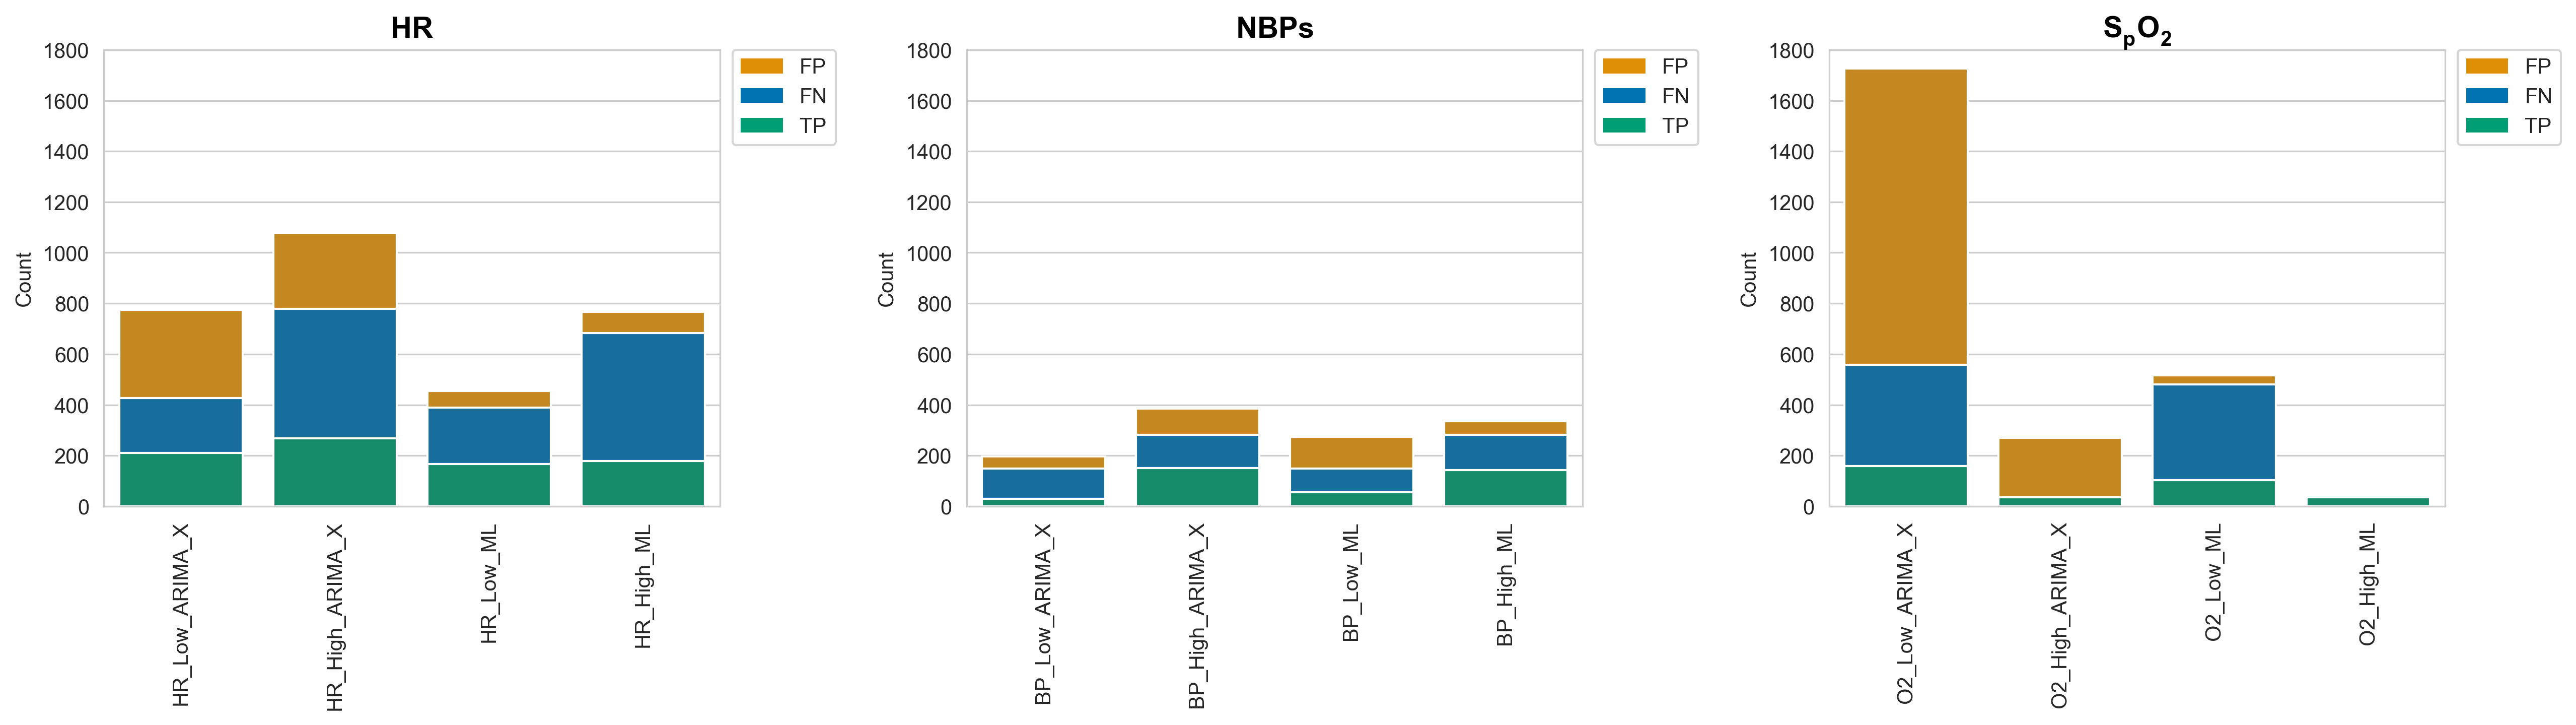

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = models_for_comparison
sns.set_style("whitegrid")
plotdata = overview

fig, axs = plt.subplots(
    1,
    3,
    figsize = (20, 4),
    dpi = 300
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]

tp_fn_fp_ylimits = [0,1800]

for i, parameter in enumerate(['HR', 'BP', 'O2']):

    sns.set_style("white")
    sns.set_context({"figure.figsize": (10, 4)})

    plotdata = overview[overview.PARAMETER == parameter][['HOLISTIC_ID_WITH_MODEL','TP','FN','FP']]
    plotdata['Series1'] = plotdata.TP + plotdata.FN + plotdata.FP
    plotdata['Series2'] = plotdata.TP + plotdata.FN
    plotdata['Series3'] = plotdata.TP

    
    fp = sns.barplot(
        ax = axs[i],
        data=plotdata,
        x='HOLISTIC_ID_WITH_MODEL',
        y='Series1',
        color = sns.color_palette("colorblind")[1],
        ci=None).tick_params(axis="x", rotation=90)

    fn = sns.barplot(
        ax = axs[i],
        data=plotdata,
        x='HOLISTIC_ID_WITH_MODEL',
        y='Series2',
        color = sns.color_palette("colorblind")[0],
        ci=None).set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    
    tp = sns.barplot(
        ax = axs[i],
        data=plotdata,
        x='HOLISTIC_ID_WITH_MODEL',
        y='Series3',
        color = sns.color_palette("colorblind")[2],
        ci=None).set(ylabel="Count")
    
    axs[i].set_ylim(tp_fn_fp_ylimits)
    axs[i].set(xlabel=None)
    leg_fp = plt.Rectangle((0,0),1,1,fc=sns.color_palette("colorblind")[1], edgecolor = 'none')
    leg_fn = plt.Rectangle((0,0),1,1,fc=sns.color_palette("colorblind")[0], edgecolor = 'none')
    lef_tp = plt.Rectangle((0,0),1,1,fc=sns.color_palette("colorblind")[2], edgecolor = 'none')
    #l = plt.legend([leg_fp, leg_fn, lef_tp], ['FP', 'FN', 'TP'], loc=1, ncol = 3, prop={'size':12}, bbox_to_anchor=(1, 1.12))
    l = axs[i].legend([leg_fp, leg_fn, lef_tp], ['FP', 'FN', 'TP'],bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    #l.draw_frame(False)    

   

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'confusion_matrix__arima-x_vs_ml_first2000_final' + timestamp + '.png'), dpi=300, bbox_inches='tight')  

## Visualization of TPR

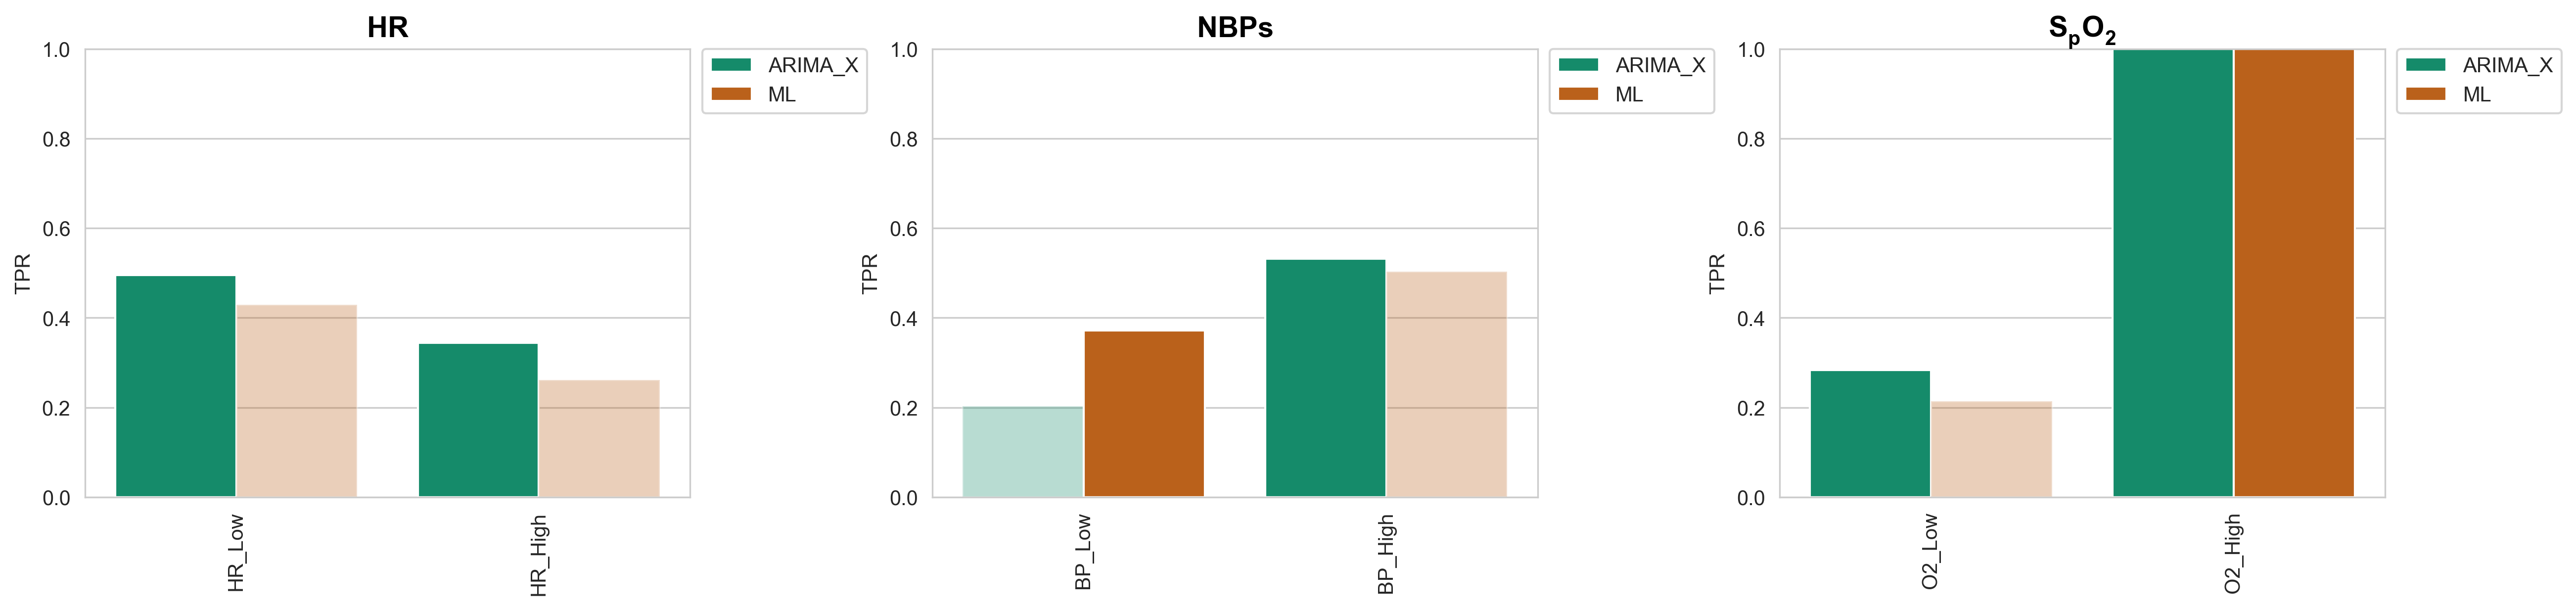

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = models_for_comparison

sns.set_style("whitegrid")
plotdata = overview

fig, axs = plt.subplots(
    1,
    3,
    figsize = (20, 4),
    dpi = 300
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

ylimits = [0,max(overview.TPR)]
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]

for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='HOLISTIC_ID',
        y='TPR',
        hue='MODEL_TYPE',
        palette = sns.color_palette("colorblind")[2:4],
        ci=None,
        #hue_order=['Low','High']
        )
    axs[i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[i].set_ylim(ylimits)
    axs[i].tick_params(axis="x", rotation=90)
    axs[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    axs[i].set(xlabel=None)    

    best_score_low = plotdata[plotdata.TPR == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].TPR.max()]['TPR'].unique()
    best_score_high = plotdata[plotdata.TPR == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].TPR.max()]['TPR'].unique()
    for bar in plot1.patches:
        if bar.get_height() != best_score_low and bar.get_height() != best_score_high :
            bar.set_alpha(0.3)

   

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'TPR_arima-x_vs_ml_first2000_transparent_final' + timestamp + '.png'), dpi=300, bbox_inches='tight') 
    

plt.show(fig)

## Visualize FPR

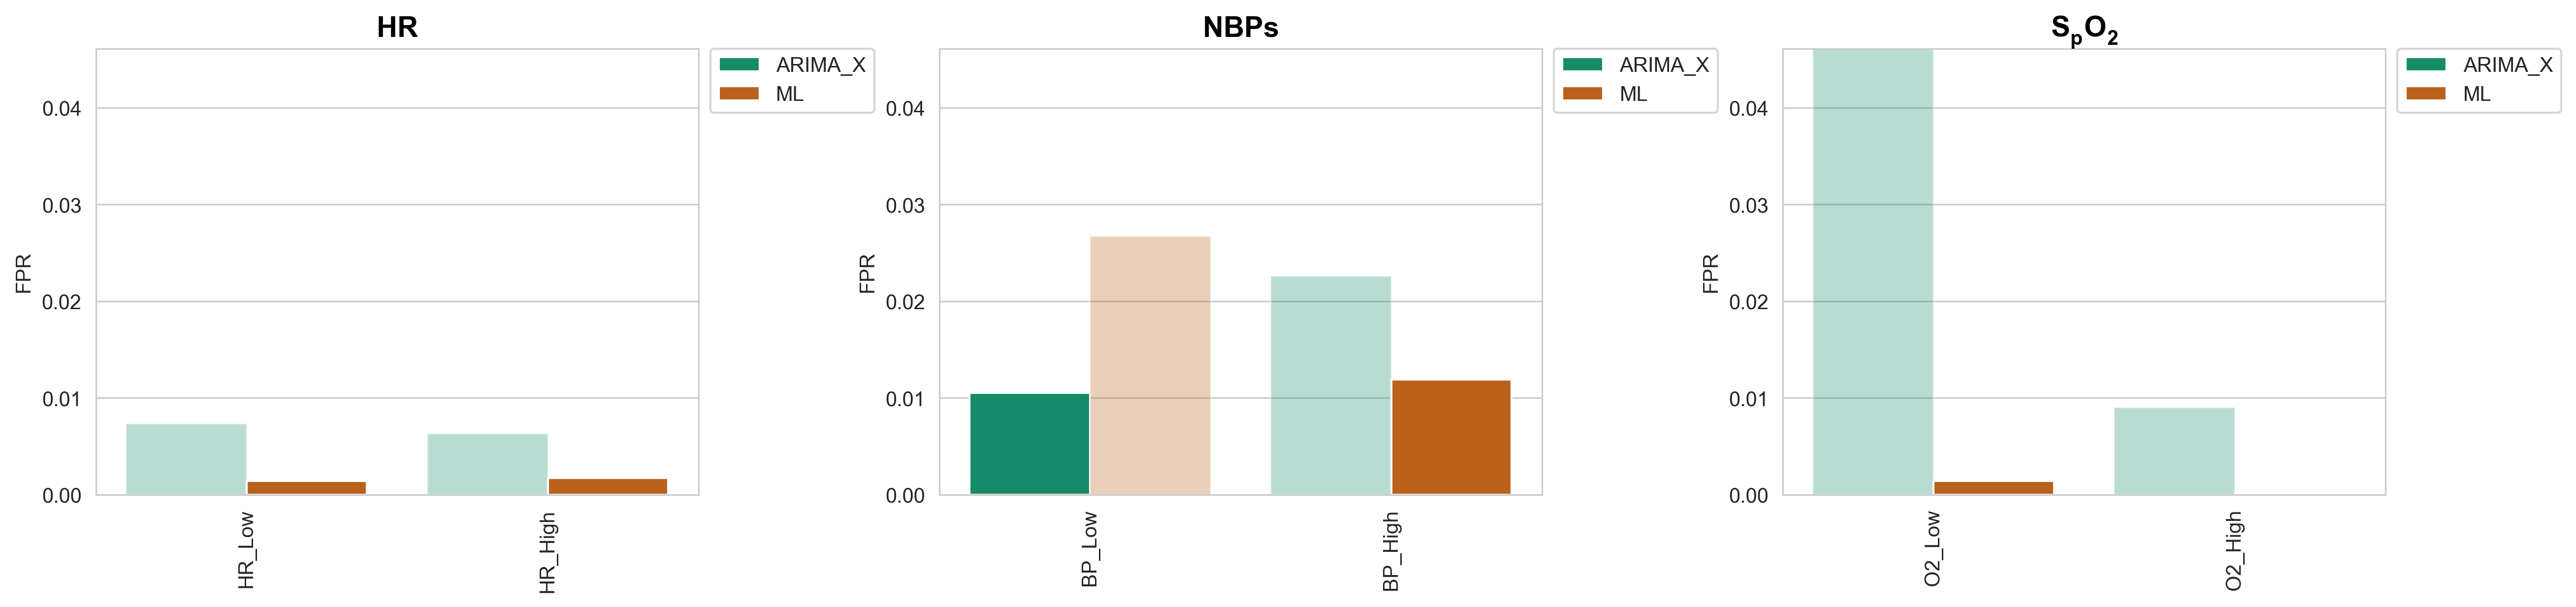

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = models_for_comparison

sns.set_style("whitegrid")
plotdata = overview

fig, axs = plt.subplots(
    1,
    3,
    figsize = (20, 4),
    dpi = 300
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

ylimits = [0,max(overview.FPR)]
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]

for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='HOLISTIC_ID',
        y='FPR',
        hue='MODEL_TYPE',
        palette = sns.color_palette("colorblind")[2:4],
        ci=None,
        #hue_order=['Low','High']
        )
    axs[i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[i].set_ylim(ylimits)
    axs[i].tick_params(axis="x", rotation=90)
    axs[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    axs[i].set(xlabel=None)    

    best_score_low = plotdata[plotdata.FPR == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].FPR.min()]['FPR'].unique()
    best_score_high = plotdata[plotdata.FPR == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].FPR.min()]['FPR'].unique()
    for bar in plot1.patches:
        if bar.get_height() != best_score_low and bar.get_height() != best_score_high :
            bar.set_alpha(0.3)

   

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'FPR_arima-x_vs_ml_first2000_transparent_final' + timestamp + '.png'), dpi=300, bbox_inches='tight') 
    

plt.show(fig)